In [1]:
import pandas as pd
import CococoNet_reader
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import Name_resolver
import tqdm as tq

In [2]:
def get_ncbi_clean_og2gene_for_species(
    species_1, og2genes_only_cococonet, ncbi_mapping
):

    species_1_name = Name_resolver.species_name_resolver(
        species_1, desired_type="common"
    )

    first_species_ortho_groups = og2genes_only_cococonet.loc[
        og2genes_only_cococonet["Species"] == species_1
    ]
    shared_orthogroups = first_species_ortho_groups["Orthogroup"].unique()

    list_of_orthogene_pds = []
    for orthogroup in tq.tqdm(
        shared_orthogroups, desc="inner_loop", position=0, leave=False
    ):
        species_1_genes = (
            first_species_ortho_groups["Gene"]
            .loc[first_species_ortho_groups["Orthogroup"] == orthogroup]
            .to_list()
        )
        all_gene_combos = species_1_genes
        current_orthogroup_pd = pd.DataFrame(
            columns=[f"{species_1_name} OrthoGene"], data=all_gene_combos
        )
        current_orthogroup_pd["Orthogroup"] = orthogroup
        list_of_orthogene_pds.append(current_orthogroup_pd)

    final_species_lineup = pd.concat(list_of_orthogene_pds)
    ncbi_added_once = final_species_lineup.merge(
        right=ncbi_mapping[["Orthodb Gene", "Symbol"]],
        right_on="Orthodb Gene",
        left_on=f"{species_1_name} OrthoGene",
    )
    ncbi_added_once_clean = ncbi_added_once.drop(columns="Orthodb Gene")
    return ncbi_added_once_clean

In [3]:
og_groups = pd.read_csv(
    "/data/passala/OrthoDB_data/NCBI_data/og_2_Genes_with_ncbi_symbol.csv"
)
og_groups

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
0,100007at3193,4558_0:003a4f,4558,3193,4558_0:003a4f,LOC110434333
1,100007at3193,4577_0:004254,4577,3193,4577_0:004254,LOC100276500
2,100007at3193,4577_0:004e43,4577,3193,4577_0:004e43,LOC100275058
3,100067at3193,4558_0:00439a,4558,3193,4558_0:00439a,LOC8071983
4,100085at3193,4558_0:002fd8,4558,3193,4558_0:002fd8,LOC8086335
...,...,...,...,...,...,...
502887,9969at3193,15368_0:000e9a,15368,3193,15368_0:000e9a,LOC100834561
502888,99917at3193,39947_0:006297,39947,3193,39947_0:006297,LOC107276177
502889,99917at3193,39947_0:00634f,39947,3193,39947_0:00634f,LOC9269479
502890,99917at3193,39947_0:006629,39947,3193,39947_0:006629,LOC9269626


In [4]:
ncbi_mapping = pd.read_csv(
    "/data/passala/OrthoDB_data/NCBI_data/merged_ncbi_to_orthodb_fixed_non_genesymbol.csv"
)

In [5]:
rice_og = get_ncbi_clean_og2gene_for_species(
    39947  , og_groups, ncbi_mapping=ncbi_mapping
)

inner_loop:   0%|          | 0/15757 [00:00<?, ?it/s]

In [6]:
arabi_og = get_ncbi_clean_og2gene_for_species(
    3702, og_groups, ncbi_mapping=ncbi_mapping
)

inner_loop:   0%|          | 0/15558 [00:00<?, ?it/s]

In [7]:
rice_og

,rice_jp OrthoGene,Orthogroup,Symbol
0,39947_0:006251,100263at3193,Os11g0187500
1,39947_0:00643c,100263at3193,LOC107279546
2,39947_0:00677b,100263at3193,LOC9271426
3,39947_0:0016e8,1004at3193,Os02g0288000
4,39947_0:00057a,10051at3193,LOC107276016
...,...,...,...
26572,39947_0:00280c,9959at3193,LOC4334580
26573,39947_0:006297,99917at3193,Os11g0656400
26574,39947_0:00634f,99917at3193,Os11g0656000
26575,39947_0:006629,99917at3193,Os11g0656700


In [8]:
arabi_og

,arabidopsis OrthoGene,Orthogroup,Symbol
0,3702_0:006584,10009at3193,AT5G42200
1,3702_0:001f5f,10092at3193,AT2G26300
2,3702_0:000e32,10147at3193,AT1G73910
3,3702_0:0018a2,10147at3193,AT1G18450
4,3702_0:000573,10228at3193,AT1G49040
...,...,...,...
25982,3702_0:004152,9877at3193,AT3G58740
25983,3702_0:00114d,9919at3193,AT1G15440
25984,3702_0:002571,9942at3193,AT2G44100
25985,3702_0:003134,9942at3193,AT3G59920


In [9]:
list_of_non_single_gene_groups_rice = pd.Series(rice_og['Orthogroup'].value_counts().loc[rice_og['Orthogroup'].value_counts() >1])

In [10]:
list_of_non_single_gene_groups_arabi = pd.Series(arabi_og['Orthogroup'].value_counts().loc[arabi_og['Orthogroup'].value_counts() >1])

In [11]:
list_of_non_single_gene_groups_arabi

Orthogroup
71601at3193     30
889985at3193    29
784291at3193    26
305752at3193    26
31749at3193     25
                ..
886139at3193     2
886191at3193     2
279836at3193     2
881138at3193     2
881005at3193     2
Name: count, Length: 5276, dtype: int64

In [12]:
list_of_non_single_gene_groups_rice

Orthogroup
136442at3193    24
887174at3193    23
227973at3193    22
889521at3193    22
133187at3193    21
                ..
10575at3193      2
105804at3193     2
106296at3193     2
10653at3193      2
105614at3193     2
Name: count, Length: 5446, dtype: int64

In [13]:
rice_og = rice_og.loc[rice_og['Orthogroup'].isin(list_of_non_single_gene_groups_rice.index)]

In [14]:
arabi_og = arabi_og.loc[arabi_og['Orthogroup'].isin(list_of_non_single_gene_groups_arabi.index)]

In [15]:
arabi_og

,arabidopsis OrthoGene,Orthogroup,Symbol
2,3702_0:000e32,10147at3193,AT1G73910
3,3702_0:0018a2,10147at3193,AT1G18450
6,3702_0:0003d0,10488at3193,AT1G08260
7,3702_0:00201b,10488at3193,AT2G27120
13,3702_0:0035a8,10772at3193,AT3G01280
...,...,...,...
25981,3702_0:00307f,9877at3193,AT3G58750
25982,3702_0:004152,9877at3193,AT3G58740
25984,3702_0:002571,9942at3193,AT2G44100
25985,3702_0:003134,9942at3193,AT3G59920


In [16]:
arabi_csv = pd.read_csv('/data/passala/Module_paper_data/Rice_arabi_cold/Ortho_vs_gene_files/arabi_reads.csv', index_col = 0)
arabi_csv = arabi_csv.T
arabi_csv

,arabi control Rep 1,arabi control Rep 2,arabi control Rep 3,arabi test Rep 1,arabi test Rep 2,arabi test Rep 3
AT1G01010,42,47,73,61,163,97
AT1G01020,92,58,84,76,171,108
AT1G03987,0,0,1,0,1,0
AT1G01030,44,20,37,25,42,17
AT1G01040,431,318,455,430,1125,651
...,...,...,...,...,...,...
ArthCt118,0,0,0,0,0,0
ArthCp083,0,0,1,0,0,0
ArthCt111,0,0,0,0,0,0
ArthCp084,2,0,0,0,0,0


In [17]:
dict_version = arabi_og[['Orthogroup','Symbol']].set_index('Symbol').to_dict()
true_dict = dict_version['Orthogroup']
arabi_csv = arabi_csv.groupby(by = true_dict).mean()

In [18]:
arabi_csv

,arabi control Rep 1,arabi control Rep 2,arabi control Rep 3,arabi test Rep 1,arabi test Rep 2,arabi test Rep 3
10147at3193,149.00,114.500000,169.500000,146.500000,325.500000,205.500000
10488at3193,85.00,61.000000,89.500000,87.000000,272.000000,139.000000
10772at3193,790.00,675.000000,897.000000,1417.500000,2993.500000,1820.000000
10950at3193,405.60,356.600000,464.200000,419.800000,1061.000000,569.400000
109808at3193,267.00,184.666667,269.000000,327.666667,627.000000,453.333333
...,...,...,...,...,...,...
9601at3193,174.25,143.250000,201.000000,164.000000,410.000000,213.750000
9609at3193,22.00,29.000000,28.000000,10.750000,31.500000,15.500000
9828at3193,114.00,81.500000,123.500000,282.500000,626.500000,380.500000
9877at3193,177.00,143.666667,162.666667,187.666667,298.333333,189.333333


In [19]:
arabi_metadata = pd.DataFrame(
    columns=["Temp"],
    data=["Control", "Control", "Control", "Test", "Test", "Test"],
    index=[
        "arabi control Rep 1",
        "arabi control Rep 2",
        "arabi control Rep 3",
        "arabi test Rep 1",
        "arabi test Rep 2",
        "arabi test Rep 3",
    ],
)

In [20]:
combined_rice = pd.read_csv("/data/passala/Module_paper_data/Rice_arabi_cold/Ortho_vs_gene_files/rice_reads.csv", index_col = 0)
combined_rice = combined_rice.T
combined_rice


,rice control Rep 1,rice control Rep 2,rice control Rep 3,rice test Rep 1,rice test Rep 2,rice test Rep 3
Os01g0100100,1401,1082,1712,602,666,744
Os01g0100200,0,2,1,2,0,0
Os01g0100300,0,0,0,0,0,0
Os01g0100400,128,89,128,56,51,14
Os01g0100466,0,0,0,0,0,0
...,...,...,...,...,...,...
Os12g0641200,9,3,2,2,3,4
Os12g0641300,13,14,15,28,23,41
Os12g0641400,3020,2189,2607,5060,6080,5053
Os12g0641500,2500,2022,3107,1855,2187,2216


In [21]:
dict_version = rice_og[['Orthogroup','Symbol']].set_index('Symbol').to_dict()
true_dict = dict_version['Orthogroup']
combined_rice = combined_rice.groupby(by = true_dict).mean()
combined_rice

,rice control Rep 1,rice control Rep 2,rice control Rep 3,rice test Rep 1,rice test Rep 2,rice test Rep 3
100263at3193,0.00,0.0,0.0,0.000000,0.0,0.000000
10051at3193,0.00,0.0,0.0,0.000000,0.0,0.000000
10107at3193,0.00,0.0,0.0,0.000000,0.0,0.000000
101302at3193,0.00,0.0,0.0,0.000000,0.0,0.000000
1013at3193,0.00,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...
9822at3193,0.00,0.0,0.0,0.000000,0.0,0.000000
98920at3193,6.00,5.0,9.0,6.000000,6.0,5.000000
9942at3193,1664.75,1345.5,1914.0,1325.250000,1582.0,1534.250000
9959at3193,1371.00,1184.0,1606.0,510.000000,654.0,622.000000


In [22]:
combined_rice = combined_rice.T
arabi_csv = arabi_csv.T

In [23]:
rice_metadata = pd.DataFrame(
    columns=["Temp"],
    data=["Control ", "Control", "Control", "Test","Test","Test",],
    index=[

        "rice control Rep 1",
        "rice control Rep 2",
        "rice control Rep 3",
        "rice test Rep 1",
        "rice test Rep 2",
        "rice test Rep 3",

    ],
)

In [24]:
combined_rice = combined_rice.round(0)
arabi_csv = arabi_csv.round(0)

In [25]:
arabi_csv

,10147at3193,10488at3193,10772at3193,10950at3193,109808at3193,109841at3193,109843at3193,109859at3193,109895at3193,109969at3193,...,929235at3193,930132at3193,9379at3193,9450at3193,9592at3193,9601at3193,9609at3193,9828at3193,9877at3193,9942at3193
arabi control Rep 1,149.0,85.0,790.0,406.0,267.0,70.0,326.0,67.0,16.0,94.0,...,192.0,0.0,0.0,1140.0,217.0,174.0,22.0,114.0,177.0,532.0
arabi control Rep 2,114.0,61.0,675.0,357.0,185.0,75.0,270.0,40.0,10.0,82.0,...,140.0,0.0,0.0,878.0,193.0,143.0,29.0,82.0,144.0,441.0
arabi control Rep 3,170.0,90.0,897.0,464.0,269.0,84.0,411.0,56.0,15.0,127.0,...,210.0,0.0,0.0,1166.0,251.0,201.0,28.0,124.0,163.0,592.0
arabi test Rep 1,146.0,87.0,1418.0,420.0,328.0,85.0,603.0,92.0,13.0,90.0,...,201.0,0.0,0.0,622.0,146.0,164.0,11.0,282.0,188.0,475.0
arabi test Rep 2,326.0,272.0,2994.0,1061.0,627.0,158.0,1320.0,220.0,32.0,206.0,...,409.0,0.0,0.0,1470.0,433.0,410.0,32.0,626.0,298.0,1160.0
arabi test Rep 3,206.0,139.0,1820.0,569.0,453.0,116.0,804.0,116.0,21.0,126.0,...,246.0,0.0,0.0,749.0,260.0,214.0,16.0,380.0,189.0,663.0


In [26]:
genes_to_keep_arabi = arabi_csv.columns[arabi_csv.sum(axis=0) >= 100]
arabi_csv = arabi_csv[genes_to_keep_arabi]
inference_arabi = DefaultInference(n_cpus=30)
dds_arabi = DeseqDataSet(
    counts=arabi_csv,
    metadata=arabi_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference_arabi,
)
dds_arabi.deseq2()
stat_res_arabi = DeseqStats(dds_arabi, inference=inference_arabi)
stat_res_arabi.summary()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.35 seconds.

Fitting dispersion trend curve...
... done in 0.13 seconds.

Fitting MAP dispersions...
... done in 0.35 seconds.

Fitting LFCs...
... done in 0.28 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Test vs Control
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
10147at3193    174.543386       -0.049851  0.143398 -0.347643  7.281084e-01   
10488at3193    108.359030        0.332401  0.176097  1.887598  5.907989e-02   
10772at3193   1280.255464        0.707963  0.096189  7.360097  1.837765e-13   
10950at3193    506.926572        0.012729  0.108233  0.117607  9.063788e-01   
109808at3193   330.349166        0.301060  0.132553  2.271244  2.313223e-02   
...                   ...             ...       ...       ...           ...   
9601at3193     203.979398       -0.117255  0.135781 -0.863561  3.878291e-01   
9609at3193      23.739177       -1.164428  0.332634 -3.500625  4.641683e-04   
9828at3193     228.540621        1.311956  0.139610  9.397322  5.596969e-21   
9877at3193     189.472829       -0.180198  0.159389 -1.130555  2.582426e-01   
9942at3193     608.675011       -0.162784  0.102075 -1.594746  1.107690e

... done in 0.27 seconds.



In [27]:
genes_to_keep = combined_rice.columns[combined_rice.sum(axis=0) >= 100]
combined_rice = combined_rice[genes_to_keep]
inference = DefaultInference(n_cpus=30)
dds_rice = DeseqDataSet(
    counts=combined_rice,
    metadata=rice_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference,
)
dds_rice.deseq2()
stat_res_rice = DeseqStats(dds_rice, inference=inference)
stat_res_rice.summary()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.28 seconds.

Fitting dispersion trend curve...
... done in 0.09 seconds.

/home/passala/miniconda3/envs/Py_deseq/lib/python3.12/site-packages/pydeseq2/dds.py:425: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prior()
Fitting MAP dispersions...
... done in 0.30 seconds.

Fitting LFCs...
... done in 0.27 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Control  vs Control
                 baseMean  log2FoldChange     lfcSE      stat    pvalue  \
10238at3193    117.912928       -0.059689  0.360002 -0.165801  0.868314   
103112at3193    20.844517        0.039788  0.987437  0.040295  0.967858   
104149at3193   555.821329        0.057582  0.222150  0.259201  0.795480   
105395at3193   112.654517        0.223998  0.459666  0.487305  0.626042   
105793at3193   442.618276        0.015548  0.238639  0.065153  0.948052   
...                   ...             ...       ...       ...       ...   
9789at3193     364.792970        0.028603  0.279973  0.102164  0.918626   
9797at3193      83.057230       -0.218619  0.478628 -0.456762  0.647842   
9814at3193     197.698917        0.282419  0.310953  0.908239  0.363752   
9942at3193    1544.703011        0.065439  0.172387  0.379602  0.704241   
9959at3193     973.345894        0.005064  0.187130  0.027063  0.978410   

                  padj  
10238at3193

... done in 0.25 seconds.



In [28]:
full_results_rice = stat_res_rice.results_df
full_results_rice
full_arabi_results = stat_res_arabi.results_df

In [29]:
#full_results_rice.to_csv('/data/passala/Module_paper_data/Rice_arabi_cold/Ortho_vs_gene_files/rice_ortho_trimmed_out_2_gene_families.csv')
#full_arabi_results.to_csv('/data/passala/Module_paper_data/Rice_arabi_cold/Ortho_vs_gene_files/arabi_ortho_trimmed_out_2_gene_families.csv')


In [31]:
random_species_1 = rice_og.copy()
random_species_2 = arabi_og.copy()

species_1_metadata = rice_metadata.copy()
species_2_metadata = arabi_metadata.copy()

species_1_csv = pd.read_csv("/data/passala/Module_paper_data/Rice_arabi_cold/Ortho_vs_gene_files/rice_reads.csv", index_col = 0)
species_1_csv = species_1_csv.T

species_2_csv = pd.read_csv('/data/passala/Module_paper_data/Rice_arabi_cold/Ortho_vs_gene_files/arabi_reads.csv', index_col = 0)
species_2_csv = species_2_csv.T


random_species_1 ['Symbol'] = random_species_1['Symbol'].sample(frac = 1).values
random_species_2 ['Symbol'] = random_species_2['Symbol'].sample(frac = 1).values

list_of_non_single_gene_groups_species_1 =  pd.Series(random_species_1['Orthogroup'].value_counts().loc[random_species_1['Orthogroup'].value_counts() >1])
list_of_non_single_gene_groups_species_2 = pd.Series(random_species_2['Orthogroup'].value_counts().loc[random_species_2['Orthogroup'].value_counts() > 1])
random_species_1 = random_species_1.loc[random_species_1['Orthogroup'].isin(list_of_non_single_gene_groups_species_1.index)]
random_species_2 = random_species_2.loc[random_species_2['Orthogroup'].isin(list_of_non_single_gene_groups_species_2.index)]

dict_version_species_1 = random_species_1[['Orthogroup','Symbol']].set_index('Symbol').to_dict()
true_dict_species_1 = dict_version_species_1['Orthogroup']
combined_species_1 = species_1_csv.groupby(by = true_dict_species_1).mean()

dict_version_species_2 = random_species_2[['Orthogroup','Symbol']].set_index('Symbol').to_dict()
true_dict_species_2 = dict_version_species_2['Orthogroup']
combined_species_2 = species_2_csv.groupby(by = true_dict_species_2).mean()

combined_species_1 = combined_species_1.T
combined_species_2 = combined_species_2.T

combined_species_1 = combined_species_1.round(0)
combined_species_2 = combined_species_2.round(0)

genes_to_keep_species_1 = combined_species_1.columns[combined_species_1.sum(axis=0) >= 100]
combined_species_1 = combined_species_1[genes_to_keep_species_1]
inference = DefaultInference(n_cpus=30)
dds_species_1 = DeseqDataSet(
    counts=combined_species_1,
    metadata=species_1_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference,
)
dds_species_1.deseq2()
stat_res_species_1 = DeseqStats(dds_species_1, inference=inference)
stat_res_species_1.summary()

genes_to_keep_species_2 = combined_species_2.columns[combined_species_2.sum(axis=0) >= 100]
combined_species_2 = combined_species_2[genes_to_keep_species_2]
inference = DefaultInference(n_cpus=30)
dds_species_2 = DeseqDataSet(
    counts=combined_species_2,
    metadata=species_2_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference,
)
dds_species_2.deseq2()
stat_res_species_2 = DeseqStats(dds_species_2, inference=inference)
stat_res_species_2.summary()

full_results_species_1 = stat_res_species_1.results_df
full_results_species_2 = stat_res_species_2.results_df

full_results_species_1.to_csv('/data/passala/Module_paper_data/Rice_arabi_cold/Ortho_vs_gene_files/rice_random_ortho.csv')
full_results_species_2.to_csv('/data/passala/Module_paper_data/Rice_arabi_cold/Ortho_vs_gene_files/arabi_random_ortho.csv')

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.28 seconds.

Fitting dispersion trend curve...
... done in 0.10 seconds.

/home/passala/miniconda3/envs/Py_deseq/lib/python3.12/site-packages/pydeseq2/dds.py:425: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prior()
Fitting MAP dispersions...
... done in 0.36 seconds.

Fitting LFCs...
... done in 0.23 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 0.18 seconds.



Log2 fold change & Wald test p-value: Temp Control  vs Control
                 baseMean  log2FoldChange     lfcSE      stat    pvalue  \
10051at3193    293.900228       -0.140081  0.257357 -0.544307  0.586230   
10054at3193   1217.271303        0.752935  0.297725  2.528966  0.011440   
10107at3193    366.798113       -0.095747  0.299497 -0.319694  0.749200   
101354at3193   358.736059        0.043090  0.238547  0.180637  0.856653   
101535at3193   444.176022       -0.229779  0.239795 -0.958230  0.337947   
...                   ...             ...       ...       ...       ...   
9797at3193     122.609844       -0.444910  0.442712 -1.004965  0.314914   
9822at3193     562.112302       -0.268107  0.246958 -1.085638  0.277639   
98920at3193     45.005377        0.563045  0.667689  0.843274  0.399075   
9942at3193      65.621893        0.025410  0.533368  0.047640  0.962003   
9959at3193    8066.251136       -0.238403  0.150776 -1.581176  0.113838   

                  padj  
10051at3193

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.42 seconds.

Fitting dispersion trend curve...
... done in 0.23 seconds.

Fitting MAP dispersions...
... done in 0.36 seconds.

Fitting LFCs...
... done in 0.30 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Test vs Control
                baseMean  log2FoldChange     lfcSE      stat        pvalue  \
10147at3193   396.174762        0.374924  0.119692  3.132409  1.733784e-03   
10488at3193   417.518996        0.210042  0.117048  1.794491  7.273487e-02   
10772at3193   892.305624       -0.215555  0.120510 -1.788686  7.366533e-02   
10950at3193   330.077512        0.171017  0.122296  1.398387  1.619968e-01   
109808at3193  125.916765        0.015622  0.167119  0.093479  9.255232e-01   
...                  ...             ...       ...       ...           ...   
9592at3193    297.846956       -0.303604  0.124673 -2.435206  1.488331e-02   
9609at3193    397.942339        0.584931  0.118260  4.946161  7.569141e-07   
9828at3193    291.543374       -0.332164  0.135602 -2.449547  1.430362e-02   
9877at3193    728.291344        0.810472  0.122996  6.589435  4.415031e-11   
9942at3193     87.358561       -0.292685  0.183409 -1.595803  1.105328e-01   

    

... done in 0.28 seconds.



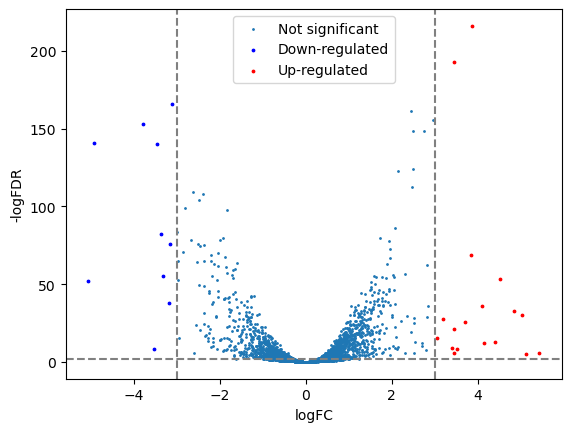

In [31]:
plt.scatter(
    x=full_arabi_results["log2FoldChange"],
    y=full_arabi_results["padj"].apply(lambda x: -np.log10(x)),
    s=1,
    label="Not significant",
)

# highlight down- or up- regulated genes
down_arabi = full_arabi_results[
    (full_arabi_results["log2FoldChange"] <= -3)
    & (full_arabi_results["padj"] <= 0.0001)
]
up_arabi = full_arabi_results[
    (full_arabi_results["log2FoldChange"] >= 3) & (full_arabi_results["padj"] <= 0.0001)
]

plt.scatter(
    x=down_arabi["log2FoldChange"],
    y=down_arabi["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Down-regulated",
    color="blue",
)
plt.scatter(
    x=up_arabi["log2FoldChange"],
    y=up_arabi["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Up-regulated",
    color="red",
)
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-3, color="grey", linestyle="--")
plt.axvline(3, color="grey", linestyle="--")
plt.axhline(2, color="grey", linestyle="--")
plt.legend()

In [ ]:
up_arabi

In [ ]:
plt.scatter(
    x=full_results["log2FoldChange"],
    y=full_results["padj"].apply(lambda x: -np.log10(x)),
    s=1,
    label="Not significant",
)

# highlight down- or up- regulated genes
down = full_results[
    (full_results["log2FoldChange"] <= -3) & (full_results["padj"] <= 0.0001)
]
up = full_results[
    (full_results["log2FoldChange"] >= 3) & (full_results["padj"] <= 0.0001)
]

plt.scatter(
    x=down["log2FoldChange"],
    y=down["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Down-regulated",
    color="blue",
)
plt.scatter(
    x=up["log2FoldChange"],
    y=up["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Up-regulated",
    color="red",
)
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-3, color="grey", linestyle="--")
plt.axvline(3, color="grey", linestyle="--")
plt.axhline(2, color="grey", linestyle="--")
plt.legend()

In [ ]:
up